In [1]:
import pandas as pd
import numpy as np
import os
import glob

from tqdm.notebook import tqdm
import gc
tqdm.pandas()

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

from crystal_toolkit.renderables import StructureGraph
from pymatgen.analysis.local_env import MinimumDistanceNN
from pymatgen.core import Structure
from pymatgen.analysis.diffraction.xrd import XRDCalculator

import scipy as sp
import scipy.special

In [2]:
path = '../input/material_projects_api_cif/'
files = os.listdir(path)
len(files)

153235

In [3]:
files

['cif_mp-10000_Hf2S.cif',
 'cif_mp-10003_Nb4CoSi.cif',
 'cif_mp-10004_Mo3P.cif',
 'cif_mp-10006_TlAgTe2.cif',
 'cif_mp-10008_Ca7Ge.cif',
 'cif_mp-10009_GaTe.cif',
 'cif_mp-1000_BaTe.cif',
 'cif_mp-1001011_TaO3.cif',
 'cif_mp-1001012_Sc2ZnS4.cif',
 'cif_mp-1001015_Y2ZnS4.cif',
 'cif_mp-1001016_Sc2ZnSe4.cif',
 'cif_mp-1001017_Zn(InSe2)2.cif',
 'cif_mp-1001019_Mg(ScSe2)2.cif',
 'cif_mp-1001021_Y2ZnSe4.cif',
 'cif_mp-1001022_Cu2PPd2.cif',
 'cif_mp-1001023_BeC2.cif',
 'cif_mp-1001024_Y2MgS4.cif',
 'cif_mp-1001034_Mg(InSe2)2.cif',
 'cif_mp-1001069_Li48P16S61.cif',
 'cif_mp-1001079_Li(CN)2.cif',
 'cif_mp-1001080_H2CO3.cif',
 'cif_mp-1001082_Si(CO)2.cif',
 'cif_mp-10010_Al(CoSi)2.cif',
 'cif_mp-1001112_Na2H3CO6.cif',
 'cif_mp-1001113_Si.cif',
 'cif_mp-1001117_Mn3N2.cif',
 'cif_mp-10013_SnS.cif',
 'cif_mp-10014_TaS2.cif',
 'cif_mp-1001571_CaFeO3.cif',
 'cif_mp-1001581_LiC6.cif',
 'cif_mp-1001594_C4O3.cif',
 'cif_mp-10015_SiOs.cif',
 'cif_mp-1001600_HfB12.cif',
 'cif_mp-1001602_B12W.cif',
 'cif_

In [4]:
# reference from https://qiita.com/ojiya/items/1b154c3698cff91c8a2b

In [5]:
struct = Structure.from_file("../input/material_projects_api_cif_1000/cif_mp-1401213_MgTi2O4.cif")

In [6]:
xrd_cond = XRDCalculator()
xrd_calcd = xrd_cond.get_pattern(struct)
print(type(xrd_calcd))

<class 'pymatgen.analysis.diffraction.core.DiffractionPattern'>


In [7]:
dict_xrd_calcd = xrd_calcd.as_dict()
print(dict_xrd_calcd.keys())

dict_keys(['@module', '@class', '@version', 'x', 'y', 'hkls', 'd_hkls'])


In [8]:
calcd_x = xrd_calcd.x
calcd_y = xrd_calcd.y
calcd_hkls = xrd_calcd.hkls
calcd_d = xrd_calcd.d_hkls

In [9]:
print(calcd_x[0], calcd_y[0], calcd_hkls[0], calcd_d[0])

11.926123983588784 49.65770548093947 [{'hkl': (0, 0, 1), 'multiplicity': 2}] 7.420734999755016


In [10]:
calcd_x

array([11.92612398, 12.00207681, 15.34846614, 18.41814661, 23.98393594,
       24.13840715, 24.85731996, 24.96945063, 28.80773317, 28.90560473,
       30.98128798, 31.69001606, 32.11172124, 35.74530458, 35.79917348,
       36.17570673, 36.31881975, 36.38856176, 36.55739785, 36.87434219,
       36.92678786, 37.33492311, 38.77874238, 40.09588541, 40.21796123,
       40.48843519, 40.68204666, 41.87823542, 43.18307692, 43.32094675,
       44.78758149, 44.9215221 , 45.17867525, 45.26739732, 47.2340778 ,
       47.80774688, 47.91391385, 48.40249533, 48.71754153, 49.1078056 ,
       49.44022363, 49.71754307, 49.80004943, 50.43851841, 50.99194942,
       51.23468057, 52.87546708, 53.01096637, 53.11206407, 53.30607434,
       54.05164067, 54.24589298, 54.80765299, 55.03852244, 56.54748852,
       56.67948552, 57.33888092, 57.38550265, 58.20764567, 58.3187245 ,
       59.64361729, 59.67086476, 59.82591329, 59.88951891, 61.48385596,
       61.91303753, 62.58891011, 63.03143429, 63.2100329 , 63.57

In [11]:
def voigt(xval,params):
    norm,center,lw,gw = params
    z = (xval - center + 1j*lw)/(gw * np.sqrt(2.0))
    w = scipy.special.wofz(z)
    model_y = norm * (w.real)/(gw * np.sqrt(2.0*np.pi))
    return model_y

Text(0, 0.5, 'Intensity (a.u.)')

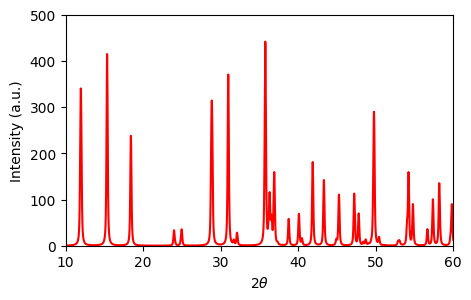

In [12]:
x = np.arange(10,90,0.02)

calcd_pattern = np.zeros(len(x))

N = len(calcd_x)
for i in range(N):
    norm = calcd_y[i]
    center = calcd_x[i]
    lw = 0.05
    gw = 0.05
    params = [norm, center, lw, gw]
    calcd_pattern += voigt(x, params)

figure = plt.figure(figsize=(5,3))
ax = figure.add_subplot(111)

ax.plot(x, calcd_pattern,color='red')

ax.set_xlim(10, 60)
ax.set_ylim(0, 500)

ax.set_xlabel(r'2$\theta$')
ax.set_ylabel('Intensity (a.u.)')

In [13]:
# 上記のfigureを保存
plt.savefig('../input/material_projects_maked_xrd_pattern/cif_mp-1401213_MgTi2O4_xrd_pattern.png')

FileNotFoundError: [Errno 2] No such file or directory: '../input/material_projects_maked_xrd_pattern/cif_mp-1401213_MgTi2O4_xrd_pattern.png'

<Figure size 640x480 with 0 Axes>

In [ ]:
# x, calcd_patternをcsvで保存、xは2theta、calcd_patternはIntensity
df = pd.DataFrame({'2theta':x, 'Intensity':calcd_pattern})
df.to_csv('../input/material_projects_maked_xrd_pattern/cif_mp-1401213_MgTi2O4_xrd_pattern.csv', index=False)

In [31]:
df

,2theta,Intensity
0,10.00,0.474121
1,10.02,0.482651
2,10.04,0.491439
3,10.06,0.500496
4,10.08,0.509832
...,...,...
3995,89.90,0.055596
3996,89.92,0.055052
3997,89.94,0.054520
3998,89.96,0.054001


In [32]:
# Set to use 'Agg' backend which does not display to the screen
plt.switch_backend('Agg')

for file in tqdm(files):
    struct = Structure.from_file(f"{path}/{file}")
    xrd_cond = XRDCalculator()
    xrd_calcd = xrd_cond.get_pattern(struct)
    
    calcd_x = xrd_calcd.x
    calcd_y = xrd_calcd.y
    calcd_hkls = xrd_calcd.hkls
    calcd_d = xrd_calcd.d_hkls
    
    calcd_pattern = np.zeros(len(x))
    
    N = len(calcd_x)
    for i in range(N):
        norm = calcd_y[i]
        center = calcd_x[i]
        lw = 0.05
        gw = 0.05
        params = [norm, center, lw, gw]
        calcd_pattern += voigt(x, params)
    
    figure = plt.figure(figsize=(5,3))
    ax = figure.add_subplot(111)
    
    ax.plot(x, calcd_pattern,color='red')
    
    ax.set_xlim(10, 60)
    ax.set_ylim(0, 500)
    
    ax.set_xlabel(r'2$\theta$ (deg)')
    ax.set_ylabel('Intensity (a.u.)')
    
    # 上記のfigureを保存
    plt.tightlayout()
    plt.savefig(f'../input/material_projects_maked_xrd_pattern_full/{file}_xrd_pattern.png',bbox_inches='tight')
    
    # x, calcd_patternをcsvで保存、xは2theta、calcd_patternはIntensity
    df = pd.DataFrame({'2theta':x, 'Intensity':calcd_pattern})
    df.to_csv(f'../input/material_projects_maked_xrd_pattern_full/{file}_xrd_pattern.csv', index=False)
    
    del struct, xrd_cond, xrd_calcd, calcd_x, calcd_y, calcd_hkls, calcd_d, calcd_pattern, df
    gc.collect()

  0%|          | 0/153235 [00:00<?, ?it/s]

Exception ignored in: <function tqdm.__del__ at 0x7f23a505d750>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/tqdm/std.py", line 1148, in __del__
    def __del__(self):
KeyboardInterrupt: 


In [ ]:
# filesのCIFファイルについて、_cell_length_a、_cell_length_b、_cell_length_cが等しく、_cell_angle_alpha、_cell_angle_beta、_cell_angle_gammaが90度であるものを抽出

def check_cubic(struct):
    if struct.lattice.a == struct.lattice.b == struct.lattice.c and struct.lattice.alpha == struct.lattice.beta == struct.lattice.gamma == 90:
        return True
    else:
        return False
    
cubic_files = []

for file in tqdm(files):
    struct = Structure.from_file(f"{path}/{file}")
    if check_cubic(struct):
        cubic_files.append(file)
    del struct
    gc.collect()

len(cubic_files)

In [ ]:
cubic_files